# Portfolio Optimization

In [60]:
! pip install pandas_datareader

In [48]:
# import the necessary libraries 
from pandas_datareader.data import DataReader
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [11]:
#create the formula to get the dates of the last 5 years.
five_years = timedelta(days=365*5, )
now = datetime.now()
five_years_ago = now - five_years
print(now)
print(five_years_ago)

2022-09-18 12:52:24.397687
2017-09-19 12:52:24.397687


In [18]:
ticker = 'GOOG'
data_source = 'yahoo'
goog = DataReader(ticker, data_source, five_years_ago, now)

In [19]:
ticker = 'CEMEXCPO.MX'
data_source = 'yahoo'
cemex = DataReader(ticker, data_source, five_years_ago, now)

In [21]:
ticker = 'MXN=X'
data_source = 'yahoo'
mxn = DataReader(ticker, data_source, five_years_ago, now)

In [38]:
df = pd.DataFrame({"goog":goog.Close, "cemex":cemex.Close, 'mxn':mxn['Close']})
# drop rows where all columns in subset are NA
df = df.dropna(axis=0, how='all', subset=('goog', 'cemex'))
# fill with the value of the previous date's values
df = df.fillna(method='ffill')
# in case there are empty rows at the beginning, fill with following date's values
df = df.fillna(method='bfill')

In [39]:
#Add a column with google prices in MXN
df['goog_mxn'] = df.goog * df.mxn

<AxesSubplot:xlabel='Date'>

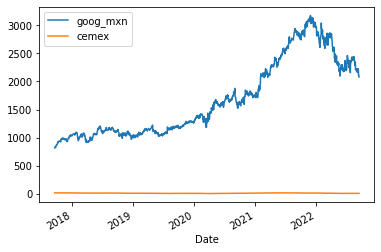

In [42]:
df.plot(y=['goog_mxn', "cemex"])

In [45]:
df.corr()

,goog,cemex,mxn,goog_mxn
goog,1.000000,0.315687,0.251548,0.992714
cemex,0.315687,1.000000,-0.393965,0.259684
mxn,0.251548,-0.393965,1.000000,0.363507
goog_mxn,0.992714,0.259684,0.363507,1.000000


In [46]:
df.cov()

,goog,cemex,mxn,goog_mxn
goog,1036.240835,34.293096,10.093320,21605.309341
cemex,34.293096,11.387800,-1.657147,592.477451
mxn,10.093320,-1.657147,1.553699,306.339288
goog_mxn,21605.309341,592.477451,306.339288,457100.805848


In [47]:
df.std()

goog         32.190695
cemex         3.374582
mxn           1.246475
goog_mxn    676.092306
dtype: float64

In [49]:
df.std() * np.sqrt(252)

goog          511.011439
cemex          53.569821
mxn            19.787171
goog_mxn    10732.632625
dtype: float64

In [53]:
df['goog_mxn_change'] = df.goog_mxn.pct_change()

In [59]:
df.to_excel('example.xlsx')